## Training Workflow

In [1]:
!pip install imblearn --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [1]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
#import sweetviz as sv
#import awswrangler as wr
#from pandas_profiling import ProfileReport

#### 1. Merge raw high spend data with demographics data and drop unnecessary columns

In [2]:
DS_Data_Path = "../DiabetesSQL/diabetesv4.csv"
demo_args_list = ["Hype_ML_demographics_19_20_21_1.csv",
                  "Hype_ML_demographics_19_20_21_2.csv"]

#cols_to_drop = []
# read MSK_data
DSdata = pd.read_csv(DS_Data_Path).rename(columns = {'partneremployerid':'client_id'})
# read all demographics data
demo_chunks = [pd.read_csv(s3_path) for s3_path in demo_args_list]
# concatenate all demographics data into one df
full_demo_data = pd.concat(demo_chunks, axis=0, join="inner", ignore_index=False, keys=None, levels=None,
                                       names=None,verify_integrity=False, copy=False)
# merge high spend & demographics data
DS_final_data = pd.merge(DSdata, full_demo_data, how = 'inner', on = ['person_internal_id', 'client_id'])

#DS_final_data = data_preprocessor.merge_dataframes(DS_Data_Path, demo_args_list, 
#                                                   drop_cols=False)   #, cols_to_drop=cols_to_drop)
DS_final_data.head()

,person_internal_id,client_id,patient_key,ds_flag_obj21,tot_billed_amt_yr_0,avg_billed_amt_yr_0,std_billed_amt_yr_0,max_billed_amt_yr_0,employer_paid_yr_0,employee_paid1_yr_0,employee_paid2_yr_0,paid_thr_deduct_yr_0,tot_billed_amt_yr_1,avg_billed_amt_yr_1,std_billed_amt_yr_1,max_billed_amt_yr_1,employer_paid_yr_1,employee_paid1_yr_1,employee_paid2_yr_1,paid_thr_deduct_yr_1,tot_billed_amt_yr,avg_billed_amt_yr,std_billed_amt_yr,max_billed_amt_yr,employer_paid_yr,employee_paid1_yr,employee_paid2_yr,paid_thr_deduct_yr,thymus_gland_flag_yr_0,adrenal_glands_flag_yr_0,parathyroid_gland_flag_yr_0,pituitary_gland_flag_yr_0,pancreatic_internal_secretion_flag_yr_0,endocrine_flag_yr_0,ovarian_dysfunction_flag_yr_0,polyglandular_dysfunction_flag_yr_0,testicular_dysfunction_flag_yr_0,gestational_diabetes_flag_yr_0,family_history_of_diabetes_flag_yr_0,high_blood_pressure_flag_yr_0,lack_of_physical_exercise_flag_yr_0,overweight_or_obesity_flag_yr_0,polyuria_flag_yr_0,polydipsia_flag_yr_0,weight_change_flag_yr_0,polyphagia_flag_yr_0,irritability_flag_yr_0,fatigue_flag_yr_0,vision_flag_yr_0,numbness_flag_yr_0,thymus_gland_flag_yr_1,adrenal_glands_flag_yr_1,parathyroid_gland_flag_yr_1,pituitary_gland_flag_yr_1,pancreatic_internal_secretion_flag_yr_1,endocrine_flag_yr_1,ovarian_dysfunction_flag_yr_1,polyglandular_dysfunction_flag_yr_1,testicular_dysfunction_flag_yr_1,gestational_diabetes_flag_yr_1,family_history_of_diabetes_flag_yr_1,high_blood_pressure_flag_yr_1,lack_of_physical_exercise_flag_yr_1,overweight_or_obesity_flag_yr_1,polyuria_flag_yr_1,polydipsia_flag_yr_1,weight_change_flag_yr_1,polyphagia_flag_yr_1,irritability_flag_yr_1,fatigue_flag_yr_1,vision_flag_yr_1,numbness_flag_yr_1,thymus_gland_flag_yr,adrenal_glands_flag_yr,parathyroid_gland_flag_yr,pituitary_gland_flag_yr,pancreatic_internal_secretion_flag_yr,endocrine_flag_yr,ovarian_dysfunction_flag_yr,polyglandular_dysfunction_flag_yr,testicular_dysfunction_flag_yr,gestational_diabetes_flag_yr,family_history_of_diabetes_flag_yr,high_blood_pressure_flag_yr,lack_of_physical_exercise_flag_yr,overweight_or_obesity_flag_yr,polyuria_flag_yr,polydipsia_flag_yr,weight_change_flag_yr,polyphagia_flag_yr,irritability_flag_yr,fatigue_flag_yr,vision_flag_yr,numbness_flag_yr,global_imaging_ind,specialist_ind,facility_imaging_ind,primary_care_ind,physician_imaging_ind,inpatient_ind,physician_ind,outpatient_ind,unknown_ind,durable_medical_ind,lab_visit_ind,global_imaging_ind_y0,specialist_ind_y0,facility_imaging_ind_y0,primary_care_ind_y0,physician_imaging_ind_y0,inpatient_ind_y0,physician_ind_y0,outpatient_ind_y0,unknown_ind_y0,durable_medical_ind_y0,lab_visit_ind_y0,global_imaging_ind_y1,specialist_ind_y1,facility_imaging_ind_y1,primary_care_ind_y1,physician_imaging_ind_y1,inpatient_ind_y1,physician_ind_y1,outpatient_ind_y1,unknown_ind_y1,durable_medical_ind_y1,lab_visit_ind_y1,udp_global_id,age,gender,marital_status,is_union,primary_language_code,country_description,state,platform_indicator_code,mapped_employment_status_code,mapped_employment_status_description,mapped_fullpart_code,mapped_fullpart_description,mapped_high_compensation_code,mapped_high_compensation_description,mapped_permanent_temporary_code,mapped_permanent_temporary_description,mapped_hourly_salary_code,mapped_hourly_salary_description,subsidiary_code,subsidiary_description,mapped_flex_status_code,mapped_flex_status_description,original_hire_date,rehire_date,is_rehire,termination_date,base_pay_regular_payrate_amount,base_pay_regular_frequency_code,base_pay_regular_frequency_description,base_pay_regular_expectedannualsalary,base_pay_regular_expectedannualsalary_range,annual_benefits_base_rate
0,60140067,2346,70917557,No,13959.42,65.537183,92.966694,1171.65,9617.61,0.0,2170.18,2171.63,7766.88,337.690435,1496.196733,7200.00,6990.25,0.0,776.63,0.00,658.72,65.872000,36.231232,124.47,0.00,0.0,0.00,658.72,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No

In [ ]:
# pd.read_csv(DS_Data_Path).shape

In [ ]:
# pd.read_csv(demo_args_list[0]).shape

In [ ]:
# pd.read_csv(demo_args_list[1]).shape

#### 2. Apply data cleaning (categorical data high level mapping) functions from general functions module

In [3]:
DS_final_data.shape

(677467, 160)

In [4]:
# adding utils folder
import sys
sys.path.insert(0,'../..')
import general_functions as gf
#import util
from importlib import reload

In [7]:
# missing values
nan_df = gf.show_nans(DS_final_data)
nan_df.head(50)

This is only nans. Unknown, outliers, unfit values are not accounted for here




,column,actual_nan,percentage_missing
141,mapped_high_compensation_description,677462,0.999993
140,mapped_high_compensation_code,581066,0.857704
146,subsidiary_code,580820,0.857341
147,subsidiary_description,580820,0.857341
132,primary_language_code,565410,0.834594
151,rehire_date,436078,0.643689
144,mapped_hourly_salary_code,361327,0.533350
145,mapped_hourly_salary_description,361327,0.533350
159,annual_benefits_base_rate,293879,0.433791
149,mapped_flex_status_description,263672,0.389203


In [5]:
DS_final_data.shape

(677467, 160)

In [7]:
DS_final_data.isnull().sum()

person_internal_id                                  0
client_id                                           0
patient_key                                         0
ds_flag_obj21                                       0
tot_billed_amt_yr_0                                 0
avg_billed_amt_yr_0                                 0
std_billed_amt_yr_0                                 0
max_billed_amt_yr_0                                 0
employer_paid_yr_0                                  0
employee_paid1_yr_0                                 0
employee_paid2_yr_0                                 0
paid_thr_deduct_yr_0                                0
tot_billed_amt_yr_1                                 0
avg_billed_amt_yr_1                                 0
std_billed_amt_yr_1                                 0
max_billed_amt_yr_1                                 0
employer_paid_yr_1                                  0
employee_paid1_yr_1                                 0
employee_paid2_yr_1         

In [9]:
perc = 30.0
min_count =  int(((100-perc)/100)*DS_final_data.shape[0] + 1)
DS_final_data = DS_final_data.dropna( axis=1, 
                thresh=min_count)

In [6]:
# adding utils folder

import sys
#sys.path.insert(0,'../..')
import general_functions as gf
from importlib import reload
gf=reload(gf)
cleaned_df = pd.DataFrame()

In [7]:
target_col="ds_flag_obj21"

In [8]:
DS_final_data = DS_final_data.assign(target = DS_final_data[target_col].map({"Yes":1,"No":0}))
DS_final_data.drop(target_col, axis=1, inplace=True)

In [9]:
DS_columns = DS_final_data.columns
DS_columns.to_list()

['person_internal_id',
 'client_id',
 'patient_key',
 'tot_billed_amt_yr_0',
 'avg_billed_amt_yr_0',
 'std_billed_amt_yr_0',
 'max_billed_amt_yr_0',
 'employer_paid_yr_0',
 'employee_paid1_yr_0',
 'employee_paid2_yr_0',
 'paid_thr_deduct_yr_0',
 'tot_billed_amt_yr_1',
 'avg_billed_amt_yr_1',
 'std_billed_amt_yr_1',
 'max_billed_amt_yr_1',
 'employer_paid_yr_1',
 'employee_paid1_yr_1',
 'employee_paid2_yr_1',
 'paid_thr_deduct_yr_1',
 'tot_billed_amt_yr',
 'avg_billed_amt_yr',
 'std_billed_amt_yr',
 'max_billed_amt_yr',
 'employer_paid_yr',
 'employee_paid1_yr',
 'employee_paid2_yr',
 'paid_thr_deduct_yr',
 'thymus_gland_flag_yr_0',
 'adrenal_glands_flag_yr_0',
 'parathyroid_gland_flag_yr_0',
 'pituitary_gland_flag_yr_0',
 'pancreatic_internal_secretion_flag_yr_0',
 'endocrine_flag_yr_0',
 'ovarian_dysfunction_flag_yr_0',
 'polyglandular_dysfunction_flag_yr_0',
 'testicular_dysfunction_flag_yr_0',
 'gestational_diabetes_flag_yr_0',
 'family_history_of_diabetes_flag_yr_0',
 'high_blood_p

In [10]:
# feature selection based on 30% of missing values or if its a description and cleaning
# cleaned_df['person_internal_id'] = DS_final_data['person_internal_id']
# cleaned_df['client_id'] = DS_final_data['client_id']
# cleaned_df['udp_global_id'] = DS_final_data['udp_global_id']
# cleaned_df['patient_key'] = DS_final_data['patient_key']

cleaned_df['age'] = DS_final_data['age'].clip(upper=80, lower=18)
cleaned_df['age'] = cleaned_df['age'].fillna(cleaned_df['age'].median())
cleaned_df['gender'] = gf.clean_gender(DS_final_data['gender'])
cleaned_df['marital_status']= gf.clean_marital_status(DS_final_data['marital_status'])
cleaned_df['base_pay_regular_payrate_amount']= DS_final_data['base_pay_regular_payrate_amount'].fillna(DS_final_data['base_pay_regular_payrate_amount'].median())
#cleaned_df['tot_billed_amt_yr_0'] = DS_final_data['tot_billed_amt_yr_0']
#cleaned_df['tot_billed_amt_yr_1'] = DS_final_data['tot_billed_amt_yr_1']
#cleaned_df['tot_billed_amt_yr'] = DS_final_data['tot_billed_amt_yr']
cleaned_df['thymus_gland_flag_yr_0'] = DS_final_data['thymus_gland_flag_yr_0']
cleaned_df['adrenal_glands_flag_yr_0'] = DS_final_data['adrenal_glands_flag_yr_0']
cleaned_df['parathyroid_gland_flag_yr_0'] = DS_final_data['parathyroid_gland_flag_yr_0']
cleaned_df['pituitary_gland_flag_yr_0'] = DS_final_data['pituitary_gland_flag_yr_0']
cleaned_df['pancreatic_internal_secretion_flag_yr_0'] = DS_final_data['pancreatic_internal_secretion_flag_yr_0']
cleaned_df['endocrine_flag_yr_0'] = DS_final_data['endocrine_flag_yr_0']
cleaned_df['ovarian_dysfunction_flag_yr_0'] = DS_final_data['ovarian_dysfunction_flag_yr_0']
cleaned_df['polyglandular_dysfunction_flag_yr_0'] = DS_final_data['polyglandular_dysfunction_flag_yr_0']
cleaned_df['testicular_dysfunction_flag_yr_0'] = DS_final_data['testicular_dysfunction_flag_yr_0']
cleaned_df['gestational_diabetes_flag_yr_0'] = DS_final_data['gestational_diabetes_flag_yr_0']
cleaned_df['family_history_of_diabetes_flag_yr_0'] = DS_final_data['family_history_of_diabetes_flag_yr_0']
cleaned_df['high_blood_pressure_flag_yr_0'] = DS_final_data['high_blood_pressure_flag_yr_0']
cleaned_df['lack_of_physical_exercise_flag_yr_0'] = DS_final_data['lack_of_physical_exercise_flag_yr_0']
cleaned_df['overweight_or_obesity_flag_yr_0'] = DS_final_data['overweight_or_obesity_flag_yr_0']
cleaned_df['polyuria_flag_yr_0'] = DS_final_data['polyuria_flag_yr_0']
cleaned_df['polydipsia_flag_yr_0'] = DS_final_data['polydipsia_flag_yr_0']
cleaned_df['weight_change_flag_yr_0'] = DS_final_data['weight_change_flag_yr_0']
cleaned_df['polyphagia_flag_yr_0'] = DS_final_data['polyphagia_flag_yr_0']
cleaned_df['irritability_flag_yr_0'] = DS_final_data['irritability_flag_yr_0']
cleaned_df['fatigue_flag_yr_0'] = DS_final_data['fatigue_flag_yr_0']
cleaned_df['vision_flag_yr_0'] = DS_final_data['vision_flag_yr_0']
cleaned_df['numbness_flag_yr_0'] = DS_final_data['numbness_flag_yr_0']

cleaned_df['thymus_gland_flag_yr_1'] = DS_final_data['thymus_gland_flag_yr_1']
cleaned_df['adrenal_glands_flag_yr_1'] = DS_final_data['adrenal_glands_flag_yr_1']
cleaned_df['parathyroid_gland_flag_yr_1'] = DS_final_data['parathyroid_gland_flag_yr_1']
cleaned_df['pituitary_gland_flag_yr_1'] = DS_final_data['pituitary_gland_flag_yr_1']
cleaned_df['pancreatic_internal_secretion_flag_yr_1'] = DS_final_data['pancreatic_internal_secretion_flag_yr_1']
cleaned_df['endocrine_flag_yr_1'] = DS_final_data['endocrine_flag_yr_1']
cleaned_df['ovarian_dysfunction_flag_yr_1'] = DS_final_data['ovarian_dysfunction_flag_yr_1']
cleaned_df['polyglandular_dysfunction_flag_yr_1'] = DS_final_data['polyglandular_dysfunction_flag_yr_1']
cleaned_df['testicular_dysfunction_flag_yr_1'] = DS_final_data['testicular_dysfunction_flag_yr_1']
cleaned_df['gestational_diabetes_flag_yr_1'] = DS_final_data['gestational_diabetes_flag_yr_1']
cleaned_df['family_history_of_diabetes_flag_yr_1'] = DS_final_data['family_history_of_diabetes_flag_yr_1']
cleaned_df['high_blood_pressure_flag_yr_1'] = DS_final_data['high_blood_pressure_flag_yr_1']
cleaned_df['lack_of_physical_exercise_flag_yr_1'] = DS_final_data['lack_of_physical_exercise_flag_yr_1']
cleaned_df['overweight_or_obesity_flag_yr_1'] = DS_final_data['overweight_or_obesity_flag_yr_1']
cleaned_df['polyuria_flag_yr_1'] = DS_final_data['polyuria_flag_yr_1']
cleaned_df['polydipsia_flag_yr_1'] = DS_final_data['polydipsia_flag_yr_1']
cleaned_df['weight_change_flag_yr_1'] = DS_final_data['weight_change_flag_yr_1']
cleaned_df['polyphagia_flag_yr_1'] = DS_final_data['polyphagia_flag_yr_1']
cleaned_df['irritability_flag_yr_1'] = DS_final_data['irritability_flag_yr_1']
cleaned_df['fatigue_flag_yr_1'] = DS_final_data['fatigue_flag_yr_1']
cleaned_df['vision_flag_yr_1'] = DS_final_data['vision_flag_yr_1']
cleaned_df['numbness_flag_yr_1'] = DS_final_data['numbness_flag_yr_1']

cleaned_df['thymus_gland_flag_yr'] = DS_final_data['thymus_gland_flag_yr']
cleaned_df['adrenal_glands_flag_yr'] = DS_final_data['adrenal_glands_flag_yr']
cleaned_df['parathyroid_gland_flag_yr'] = DS_final_data['parathyroid_gland_flag_yr']
cleaned_df['pituitary_gland_flag_yr'] = DS_final_data['pituitary_gland_flag_yr']
cleaned_df['pancreatic_internal_secretion_flag_yr'] = DS_final_data['pancreatic_internal_secretion_flag_yr']
cleaned_df['endocrine_flag_yr'] = DS_final_data['endocrine_flag_yr']
cleaned_df['ovarian_dysfunction_flag_yr'] = DS_final_data['ovarian_dysfunction_flag_yr']
cleaned_df['polyglandular_dysfunction_flag_yr'] = DS_final_data['polyglandular_dysfunction_flag_yr']
cleaned_df['testicular_dysfunction_flag_yr'] = DS_final_data['testicular_dysfunction_flag_yr']
cleaned_df['gestational_diabetes_flag_yr'] = DS_final_data['gestational_diabetes_flag_yr']
cleaned_df['family_history_of_diabetes_flag_yr'] = DS_final_data['family_history_of_diabetes_flag_yr']
cleaned_df['high_blood_pressure_flag_yr'] = DS_final_data['high_blood_pressure_flag_yr']
cleaned_df['lack_of_physical_exercise_flag_yr'] = DS_final_data['lack_of_physical_exercise_flag_yr']
cleaned_df['overweight_or_obesity_flag_yr'] = DS_final_data['overweight_or_obesity_flag_yr']
cleaned_df['polyuria_flag_yr'] = DS_final_data['polyuria_flag_yr']
cleaned_df['polydipsia_flag_yr'] = DS_final_data['polydipsia_flag_yr']
cleaned_df['weight_change_flag_yr'] = DS_final_data['weight_change_flag_yr']
cleaned_df['polyphagia_flag_yr'] = DS_final_data['polyphagia_flag_yr']
cleaned_df['irritability_flag_yr'] = DS_final_data['irritability_flag_yr']
cleaned_df['fatigue_flag_yr'] = DS_final_data['fatigue_flag_yr']
cleaned_df['vision_flag_yr'] = DS_final_data['vision_flag_yr']
cleaned_df['numbness_flag_yr'] = DS_final_data['numbness_flag_yr']


cleaned_df['global_imaging_ind'] = DS_final_data['global_imaging_ind']
cleaned_df['specialist_ind'] = DS_final_data['specialist_ind']
cleaned_df['facility_imaging_ind'] = DS_final_data['facility_imaging_ind']
cleaned_df['primary_care_ind'] = DS_final_data['primary_care_ind']
cleaned_df['physician_imaging_ind'] = DS_final_data['physician_imaging_ind']
cleaned_df['inpatient_ind'] = DS_final_data['inpatient_ind']
cleaned_df['physician_ind'] = DS_final_data['physician_ind']
cleaned_df['outpatient_ind'] = DS_final_data['outpatient_ind']
cleaned_df['unknown_ind'] = DS_final_data['unknown_ind']
cleaned_df['durable_medical_ind'] = DS_final_data['durable_medical_ind']
cleaned_df['lab_visit_ind'] = DS_final_data['lab_visit_ind']
cleaned_df['global_imaging_ind_y0'] = DS_final_data['global_imaging_ind_y0']
cleaned_df['specialist_ind_y0'] = DS_final_data['specialist_ind_y0']
cleaned_df['facility_imaging_ind_y0'] = DS_final_data['facility_imaging_ind_y0']
cleaned_df['primary_care_ind_y0'] = DS_final_data['primary_care_ind_y0']
cleaned_df['physician_imaging_ind_y0'] = DS_final_data['physician_imaging_ind_y0']
cleaned_df['inpatient_ind_y0'] = DS_final_data['inpatient_ind_y0']
cleaned_df['physician_ind_y0'] = DS_final_data['physician_ind_y0']
cleaned_df['outpatient_ind_y0'] = DS_final_data['outpatient_ind_y0']
cleaned_df['unknown_ind_y0'] = DS_final_data['unknown_ind_y0']
cleaned_df['durable_medical_ind_y0'] = DS_final_data['durable_medical_ind_y0']
cleaned_df['lab_visit_ind_y0'] = DS_final_data['lab_visit_ind_y0']
cleaned_df['global_imaging_ind_y1'] = DS_final_data['global_imaging_ind_y1']
cleaned_df['specialist_ind_y1'] = DS_final_data['specialist_ind_y1']
cleaned_df['facility_imaging_ind_y1'] = DS_final_data['facility_imaging_ind_y1']
cleaned_df['primary_care_ind_y1'] = DS_final_data['primary_care_ind_y1']
cleaned_df['physician_imaging_ind_y1'] = DS_final_data['physician_imaging_ind_y1']
cleaned_df['inpatient_ind_y1'] = DS_final_data['inpatient_ind_y1']
cleaned_df['physician_ind_y1'] = DS_final_data['physician_ind_y1']
cleaned_df['outpatient_ind_y1'] = DS_final_data['outpatient_ind_y1']
cleaned_df['unknown_ind_y1'] = DS_final_data['unknown_ind_y1']
cleaned_df['durable_medical_ind_y1'] = DS_final_data['durable_medical_ind_y1']
cleaned_df['lab_visit_ind_y1'] = DS_final_data['lab_visit_ind_y1']
#cleaned_df['target'] = DS_final_data["ds_flag_obj21"]
cleaned_df['target'] = DS_final_data["target"]
cleaned_df.head()

Mapping was successful for : gender
Mapping was successful for : marital_status


,age,gender,marital_status,base_pay_regular_payrate_amount,thymus_gland_flag_yr_0,adrenal_glands_flag_yr_0,parathyroid_gland_flag_yr_0,pituitary_gland_flag_yr_0,pancreatic_internal_secretion_flag_yr_0,endocrine_flag_yr_0,ovarian_dysfunction_flag_yr_0,polyglandular_dysfunction_flag_yr_0,testicular_dysfunction_flag_yr_0,gestational_diabetes_flag_yr_0,family_history_of_diabetes_flag_yr_0,high_blood_pressure_flag_yr_0,lack_of_physical_exercise_flag_yr_0,overweight_or_obesity_flag_yr_0,polyuria_flag_yr_0,polydipsia_flag_yr_0,weight_change_flag_yr_0,polyphagia_flag_yr_0,irritability_flag_yr_0,fatigue_flag_yr_0,vision_flag_yr_0,numbness_flag_yr_0,thymus_gland_flag_yr_1,adrenal_glands_flag_yr_1,parathyroid_gland_flag_yr_1,pituitary_gland_flag_yr_1,pancreatic_internal_secretion_flag_yr_1,endocrine_flag_yr_1,ovarian_dysfunction_flag_yr_1,polyglandular_dysfunction_flag_yr_1,testicular_dysfunction_flag_yr_1,gestational_diabetes_flag_yr_1,family_history_of_diabetes_flag_yr_1,high_blood_pressure_flag_yr_1,lack_of_physical_exercise_flag_yr_1,overweight_or_obesity_flag_yr_1,polyuria_flag_yr_1,polydipsia_flag_yr_1,weight_change_flag_yr_1,polyphagia_flag_yr_1,irritability_flag_yr_1,fatigue_flag_yr_1,vision_flag_yr_1,numbness_flag_yr_1,thymus_gland_flag_yr,adrenal_glands_flag_yr,parathyroid_gland_flag_yr,pituitary_gland_flag_yr,pancreatic_internal_secretion_flag_yr,endocrine_flag_yr,ovarian_dysfunction_flag_yr,polyglandular_dysfunction_flag_yr,testicular_dysfunction_flag_yr,gestational_diabetes_flag_yr,family_history_of_diabetes_flag_yr,high_blood_pressure_flag_yr,lack_of_physical_exercise_flag_yr,overweight_or_obesity_flag_yr,polyuria_flag_yr,polydipsia_flag_yr,weight_change_flag_yr,polyphagia_flag_yr,irritability_flag_yr,fatigue_flag_yr,vision_flag_yr,numbness_flag_yr,global_imaging_ind,specialist_ind,facility_imaging_ind,primary_care_ind,physician_imaging_ind,inpatient_ind,physician_ind,outpatient_ind,unknown_ind,durable_medical_ind,lab_visit_ind,global_imaging_ind_y0,specialist_ind_y0,facility_imaging_ind_y0,primary_care_ind_y0,physician_imaging_ind_y0,inpatient_ind_y0,physician_ind_y0,outpatient_ind_y0,unknown_ind_y0,durable_medical_ind_y0,lab_visit_ind_y0,global_imaging_ind_y1,specialist_ind_y1,facility_imaging_ind_y1,primary_care_ind_y1,physician_imaging_ind_y1,inpatient_ind_y1,physician_ind_y1,outpatient_ind_y1,unknown_ind_y1,durable_medical_ind_y1,lab_visit_ind_y1,target
0,48.0,M,S,138000.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,No,Yes,No,0
1,38.0,F,S,111100.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,0
2,59.0,M,M,85000.00,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,0
3,80.0,F,S,65563.20,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,0
4,57.0,M,U,193400.22,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,

#### 3. Create Target Variable

In [11]:
cleaned_df.shape

(677467, 104)

In [12]:
cleaned_df.drop_duplicates(inplace=True)
cleaned_df.shape

(660140, 104)

#### 4. Filter & Retain Columns for Modeling

In [13]:
cleaned_df.columns.to_list()

['age',
 'gender',
 'marital_status',
 'base_pay_regular_payrate_amount',
 'thymus_gland_flag_yr_0',
 'adrenal_glands_flag_yr_0',
 'parathyroid_gland_flag_yr_0',
 'pituitary_gland_flag_yr_0',
 'pancreatic_internal_secretion_flag_yr_0',
 'endocrine_flag_yr_0',
 'ovarian_dysfunction_flag_yr_0',
 'polyglandular_dysfunction_flag_yr_0',
 'testicular_dysfunction_flag_yr_0',
 'gestational_diabetes_flag_yr_0',
 'family_history_of_diabetes_flag_yr_0',
 'high_blood_pressure_flag_yr_0',
 'lack_of_physical_exercise_flag_yr_0',
 'overweight_or_obesity_flag_yr_0',
 'polyuria_flag_yr_0',
 'polydipsia_flag_yr_0',
 'weight_change_flag_yr_0',
 'polyphagia_flag_yr_0',
 'irritability_flag_yr_0',
 'fatigue_flag_yr_0',
 'vision_flag_yr_0',
 'numbness_flag_yr_0',
 'thymus_gland_flag_yr_1',
 'adrenal_glands_flag_yr_1',
 'parathyroid_gland_flag_yr_1',
 'pituitary_gland_flag_yr_1',
 'pancreatic_internal_secretion_flag_yr_1',
 'endocrine_flag_yr_1',
 'ovarian_dysfunction_flag_yr_1',
 'polyglandular_dysfunction_f

In [ ]:
#DS_final_data = DS_final_data.dropna()

In [14]:
# checking target distribution for non missing rows, if it is equal or less than the existing gap then rows will be removed
not_missing_df = cleaned_df.dropna()
print(f"Was {cleaned_df.shape}\nis {not_missing_df.shape}")
not_missing_df["target"].value_counts(normalize=True)

Was (660140, 104)
is (660140, 104)


0    0.912638
1    0.087362
Name: target, dtype: float64

In [15]:
not_missing_df.columns

Index(['age', 'gender', 'marital_status', 'base_pay_regular_payrate_amount',
       'thymus_gland_flag_yr_0', 'adrenal_glands_flag_yr_0',
       'parathyroid_gland_flag_yr_0', 'pituitary_gland_flag_yr_0',
       'pancreatic_internal_secretion_flag_yr_0', 'endocrine_flag_yr_0',
       ...
       'facility_imaging_ind_y1', 'primary_care_ind_y1',
       'physician_imaging_ind_y1', 'inpatient_ind_y1', 'physician_ind_y1',
       'outpatient_ind_y1', 'unknown_ind_y1', 'durable_medical_ind_y1',
       'lab_visit_ind_y1', 'target'],
      dtype='object', length=104)

In [19]:
not_missing_df.head()

,age,gender,marital_status,base_pay_regular_payrate_amount,tot_billed_amt_yr_0,tot_billed_amt_yr_1,tot_billed_amt_yr,thymus_gland_flag_yr_0,adrenal_glands_flag_yr_0,parathyroid_gland_flag_yr_0,pituitary_gland_flag_yr_0,pancreatic_internal_secretion_flag_yr_0,endocrine_flag_yr_0,ovarian_dysfunction_flag_yr_0,polyglandular_dysfunction_flag_yr_0,testicular_dysfunction_flag_yr_0,gestational_diabetes_flag_yr_0,family_history_of_diabetes_flag_yr_0,high_blood_pressure_flag_yr_0,lack_of_physical_exercise_flag_yr_0,overweight_or_obesity_flag_yr_0,polyuria_flag_yr_0,thymus_gland_flag_yr_1,adrenal_glands_flag_yr_1,parathyroid_gland_flag_yr_1,pituitary_gland_flag_yr_1,pancreatic_internal_secretion_flag_yr_1,endocrine_flag_yr_1,ovarian_dysfunction_flag_yr_1,polyglandular_dysfunction_flag_yr_1,testicular_dysfunction_flag_yr_1,gestational_diabetes_flag_yr_1,family_history_of_diabetes_flag_yr_1,high_blood_pressure_flag_yr_1,lack_of_physical_exercise_flag_yr_1,overweight_or_obesity_flag_yr_1,polyuria_flag_yr_1,thymus_gland_flag_yr,adrenal_glands_flag_yr,parathyroid_gland_flag_yr,pituitary_gland_flag_yr,pancreatic_internal_secretion_flag_yr,endocrine_flag_yr,ovarian_dysfunction_flag_yr,polyglandular_dysfunction_flag_yr,testicular_dysfunction_flag_yr,gestational_diabetes_flag_yr,family_history_of_diabetes_flag_yr,high_blood_pressure_flag_yr,lack_of_physical_exercise_flag_yr,overweight_or_obesity_flag_yr,polyuria_flag_yr,global_imaging_ind,specialist_ind,facility_imaging_ind,primary_care_ind,physician_imaging_ind,inpatient_ind,physician_ind,outpatient_ind,unknown_ind,durable_medical_ind,lab_visit_ind,global_imaging_ind_y0,specialist_ind_y0,facility_imaging_ind_y0,primary_care_ind_y0,physician_imaging_ind_y0,inpatient_ind_y0,physician_ind_y0,outpatient_ind_y0,unknown_ind_y0,durable_medical_ind_y0,lab_visit_ind_y0,global_imaging_ind_y1,specialist_ind_y1,facility_imaging_ind_y1,primary_care_ind_y1,physician_imaging_ind_y1,inpatient_ind_y1,physician_ind_y1,outpatient_ind_y1,unknown_ind_y1,durable_medical_ind_y1,lab_visit_ind_y1,target
0,28.0,M,M,83421.0,1008.75,48.23,1116.02,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,0
1,44.0,M,S,40809.6,2548.36,2409.16,48756.00,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,Yes,No,No,Yes,0
2,53.0,F,S,141741.6,1729.57,473.34,111471.31,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,0
3,26.0,M,S,71000.0,0.00,0.00,94.94,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
4,56.0,M,S,89262.0,639.56,9166.55,226.84,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,1


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
no_encoding_needed = [i for i in not_missing_df.columns if "_ind$" in i or "_ind" in i or "_flag_" in i or "_ind_" in i]
no_encoding_needed

['thymus_gland_flag_yr_0',
 'adrenal_glands_flag_yr_0',
 'parathyroid_gland_flag_yr_0',
 'pituitary_gland_flag_yr_0',
 'pancreatic_internal_secretion_flag_yr_0',
 'endocrine_flag_yr_0',
 'ovarian_dysfunction_flag_yr_0',
 'polyglandular_dysfunction_flag_yr_0',
 'testicular_dysfunction_flag_yr_0',
 'gestational_diabetes_flag_yr_0',
 'family_history_of_diabetes_flag_yr_0',
 'high_blood_pressure_flag_yr_0',
 'lack_of_physical_exercise_flag_yr_0',
 'overweight_or_obesity_flag_yr_0',
 'polyuria_flag_yr_0',
 'polydipsia_flag_yr_0',
 'weight_change_flag_yr_0',
 'polyphagia_flag_yr_0',
 'irritability_flag_yr_0',
 'fatigue_flag_yr_0',
 'vision_flag_yr_0',
 'numbness_flag_yr_0',
 'thymus_gland_flag_yr_1',
 'adrenal_glands_flag_yr_1',
 'parathyroid_gland_flag_yr_1',
 'pituitary_gland_flag_yr_1',
 'pancreatic_internal_secretion_flag_yr_1',
 'endocrine_flag_yr_1',
 'ovarian_dysfunction_flag_yr_1',
 'polyglandular_dysfunction_flag_yr_1',
 'testicular_dysfunction_flag_yr_1',
 'gestational_diabetes_fla

In [18]:
columns_to_one_hot = [i for i in not_missing_df.select_dtypes('object').columns.to_list() if "salary_range" not in i and "base_pay_regular_payrate_amount" not in i and "_ind" not in i and "_ind$" not in i and "_flag_" not in i and "_ind_" not in i and i!="target"]
columns_to_one_hot

['gender', 'marital_status']

In [19]:
# this will change on case to case basis
columns_to_label_encode = [i for i in not_missing_df.select_dtypes('object').columns.to_list() if "salary_range" in i and i not in no_encoding_needed ]
columns_to_label_encode

[]

In [20]:
columns_as_is = [i for i in not_missing_df.columns if i not in columns_to_label_encode and i not in columns_to_one_hot and i not in no_encoding_needed ]
columns_as_is

['age', 'base_pay_regular_payrate_amount', 'target']

In [21]:
# must be true else some column is missing
len(columns_to_one_hot)+len(columns_to_label_encode)+len(columns_as_is)+len(no_encoding_needed) == not_missing_df.shape[1]

True

In [22]:
one_hot_encoded_df = pd.DataFrame()

In [23]:
for n, categorical_feature in enumerate(columns_to_one_hot):
    print(f"Adding {n+1}/{len(columns_to_one_hot)} {categorical_feature} ...")
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, pd.get_dummies(not_missing_df[categorical_feature], prefix=categorical_feature)], axis=1)
one_hot_encoded_df.head()

Adding 1/2 gender ...
Adding 2/2 marital_status ...


,gender_F,gender_M,gender_U,marital_status_D,marital_status_M,marital_status_S,marital_status_U,marital_status_W
0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0


In [24]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660140 entries, 0 to 677466
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   gender_F          660140 non-null  uint8
 1   gender_M          660140 non-null  uint8
 2   gender_U          660140 non-null  uint8
 3   marital_status_D  660140 non-null  uint8
 4   marital_status_M  660140 non-null  uint8
 5   marital_status_S  660140 non-null  uint8
 6   marital_status_U  660140 non-null  uint8
 7   marital_status_W  660140 non-null  uint8
dtypes: uint8(8)
memory usage: 10.1 MB


In [25]:
one_hot_encoded_df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
# unneccesary step
encoded_df_one_hot = one_hot_encoded_df.fillna(0)
encoded_df_one_hot.head()

,gender_F,gender_M,gender_U,marital_status_D,marital_status_M,marital_status_S,marital_status_U,marital_status_W
0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0


In [27]:
to_label_encode_df = not_missing_df[columns_to_label_encode]
encoded_df_label = to_label_encode_df.astype(str).apply(LabelEncoder().fit_transform)
encoded_df_label.head()

Series([], dtype: float64)

In [28]:
# yes and no columsn to 1 and 0
yes_no_df = pd.DataFrame()
for i in no_encoding_needed:
    yes_no_df[i] = not_missing_df[i].map({"Yes":1,"No":0})
yes_no_df.head()

,thymus_gland_flag_yr_0,adrenal_glands_flag_yr_0,parathyroid_gland_flag_yr_0,pituitary_gland_flag_yr_0,pancreatic_internal_secretion_flag_yr_0,endocrine_flag_yr_0,ovarian_dysfunction_flag_yr_0,polyglandular_dysfunction_flag_yr_0,testicular_dysfunction_flag_yr_0,gestational_diabetes_flag_yr_0,family_history_of_diabetes_flag_yr_0,high_blood_pressure_flag_yr_0,lack_of_physical_exercise_flag_yr_0,overweight_or_obesity_flag_yr_0,polyuria_flag_yr_0,polydipsia_flag_yr_0,weight_change_flag_yr_0,polyphagia_flag_yr_0,irritability_flag_yr_0,fatigue_flag_yr_0,vision_flag_yr_0,numbness_flag_yr_0,thymus_gland_flag_yr_1,adrenal_glands_flag_yr_1,parathyroid_gland_flag_yr_1,pituitary_gland_flag_yr_1,pancreatic_internal_secretion_flag_yr_1,endocrine_flag_yr_1,ovarian_dysfunction_flag_yr_1,polyglandular_dysfunction_flag_yr_1,testicular_dysfunction_flag_yr_1,gestational_diabetes_flag_yr_1,family_history_of_diabetes_flag_yr_1,high_blood_pressure_flag_yr_1,lack_of_physical_exercise_flag_yr_1,overweight_or_obesity_flag_yr_1,polyuria_flag_yr_1,polydipsia_flag_yr_1,weight_change_flag_yr_1,polyphagia_flag_yr_1,irritability_flag_yr_1,fatigue_flag_yr_1,vision_flag_yr_1,numbness_flag_yr_1,thymus_gland_flag_yr,adrenal_glands_flag_yr,parathyroid_gland_flag_yr,pituitary_gland_flag_yr,pancreatic_internal_secretion_flag_yr,endocrine_flag_yr,ovarian_dysfunction_flag_yr,polyglandular_dysfunction_flag_yr,testicular_dysfunction_flag_yr,gestational_diabetes_flag_yr,family_history_of_diabetes_flag_yr,high_blood_pressure_flag_yr,lack_of_physical_exercise_flag_yr,overweight_or_obesity_flag_yr,polyuria_flag_yr,polydipsia_flag_yr,weight_change_flag_yr,polyphagia_flag_yr,irritability_flag_yr,fatigue_flag_yr,vision_flag_yr,numbness_flag_yr,global_imaging_ind,specialist_ind,facility_imaging_ind,primary_care_ind,physician_imaging_ind,inpatient_ind,physician_ind,outpatient_ind,unknown_ind,durable_medical_ind,lab_visit_ind,global_imaging_ind_y0,specialist_ind_y0,facility_imaging_ind_y0,primary_care_ind_y0,physician_imaging_ind_y0,inpatient_ind_y0,physician_ind_y0,outpatient_ind_y0,unknown_ind_y0,durable_medical_ind_y0,lab_visit_ind_y0,global_imaging_ind_y1,specialist_ind_y1,facility_imaging_ind_y1,primary_care_ind_y1,physician_imaging_ind_y1,inpatient_ind_y1,physician_ind_y1,outpatient_ind_y1,unknown_ind_y1,durable_medical_ind_y1,lab_visit_ind_y1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1


In [29]:
complete_df = pd.concat([yes_no_df,encoded_df_one_hot, not_missing_df[columns_as_is]], axis=1)
complete_df.head()

,thymus_gland_flag_yr_0,adrenal_glands_flag_yr_0,parathyroid_gland_flag_yr_0,pituitary_gland_flag_yr_0,pancreatic_internal_secretion_flag_yr_0,endocrine_flag_yr_0,ovarian_dysfunction_flag_yr_0,polyglandular_dysfunction_flag_yr_0,testicular_dysfunction_flag_yr_0,gestational_diabetes_flag_yr_0,family_history_of_diabetes_flag_yr_0,high_blood_pressure_flag_yr_0,lack_of_physical_exercise_flag_yr_0,overweight_or_obesity_flag_yr_0,polyuria_flag_yr_0,polydipsia_flag_yr_0,weight_change_flag_yr_0,polyphagia_flag_yr_0,irritability_flag_yr_0,fatigue_flag_yr_0,vision_flag_yr_0,numbness_flag_yr_0,thymus_gland_flag_yr_1,adrenal_glands_flag_yr_1,parathyroid_gland_flag_yr_1,pituitary_gland_flag_yr_1,pancreatic_internal_secretion_flag_yr_1,endocrine_flag_yr_1,ovarian_dysfunction_flag_yr_1,polyglandular_dysfunction_flag_yr_1,testicular_dysfunction_flag_yr_1,gestational_diabetes_flag_yr_1,family_history_of_diabetes_flag_yr_1,high_blood_pressure_flag_yr_1,lack_of_physical_exercise_flag_yr_1,overweight_or_obesity_flag_yr_1,polyuria_flag_yr_1,polydipsia_flag_yr_1,weight_change_flag_yr_1,polyphagia_flag_yr_1,irritability_flag_yr_1,fatigue_flag_yr_1,vision_flag_yr_1,numbness_flag_yr_1,thymus_gland_flag_yr,adrenal_glands_flag_yr,parathyroid_gland_flag_yr,pituitary_gland_flag_yr,pancreatic_internal_secretion_flag_yr,endocrine_flag_yr,ovarian_dysfunction_flag_yr,polyglandular_dysfunction_flag_yr,testicular_dysfunction_flag_yr,gestational_diabetes_flag_yr,family_history_of_diabetes_flag_yr,high_blood_pressure_flag_yr,lack_of_physical_exercise_flag_yr,overweight_or_obesity_flag_yr,polyuria_flag_yr,polydipsia_flag_yr,weight_change_flag_yr,polyphagia_flag_yr,irritability_flag_yr,fatigue_flag_yr,vision_flag_yr,numbness_flag_yr,global_imaging_ind,specialist_ind,facility_imaging_ind,primary_care_ind,physician_imaging_ind,inpatient_ind,physician_ind,outpatient_ind,unknown_ind,durable_medical_ind,lab_visit_ind,global_imaging_ind_y0,specialist_ind_y0,facility_imaging_ind_y0,primary_care_ind_y0,physician_imaging_ind_y0,inpatient_ind_y0,physician_ind_y0,outpatient_ind_y0,unknown_ind_y0,durable_medical_ind_y0,lab_visit_ind_y0,global_imaging_ind_y1,specialist_ind_y1,facility_imaging_ind_y1,primary_care_ind_y1,physician_imaging_ind_y1,inpatient_ind_y1,physician_ind_y1,outpatient_ind_y1,unknown_ind_y1,durable_medical_ind_y1,lab_visit_ind_y1,gender_F,gender_M,gender_U,marital_status_D,marital_status_M,marital_status_S,marital_status_U,marital_status_W,age,base_pay_regular_payrate_amount,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,48.0,138000.00,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,38.0,111100.00,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,59.0,85000.00,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,80.0,65563.20,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,57.0,193400.22,0


In [30]:
complete_df.shape

(660140, 110)

In [31]:
complete_df.to_csv(f"./for_model_raw_{gf.file_time()}.csv")

In [9]:
complete_df = pd.read_csv(f"./for_model_raw_20221118185641.csv", index_col =0)
complete_df.head()

,thymus_gland_flag_yr_0,adrenal_glands_flag_yr_0,parathyroid_gland_flag_yr_0,pituitary_gland_flag_yr_0,pancreatic_internal_secretion_flag_yr_0,endocrine_flag_yr_0,ovarian_dysfunction_flag_yr_0,polyglandular_dysfunction_flag_yr_0,testicular_dysfunction_flag_yr_0,gestational_diabetes_flag_yr_0,family_history_of_diabetes_flag_yr_0,high_blood_pressure_flag_yr_0,lack_of_physical_exercise_flag_yr_0,overweight_or_obesity_flag_yr_0,polyuria_flag_yr_0,polydipsia_flag_yr_0,weight_change_flag_yr_0,polyphagia_flag_yr_0,irritability_flag_yr_0,fatigue_flag_yr_0,vision_flag_yr_0,numbness_flag_yr_0,thymus_gland_flag_yr_1,adrenal_glands_flag_yr_1,parathyroid_gland_flag_yr_1,pituitary_gland_flag_yr_1,pancreatic_internal_secretion_flag_yr_1,endocrine_flag_yr_1,ovarian_dysfunction_flag_yr_1,polyglandular_dysfunction_flag_yr_1,testicular_dysfunction_flag_yr_1,gestational_diabetes_flag_yr_1,family_history_of_diabetes_flag_yr_1,high_blood_pressure_flag_yr_1,lack_of_physical_exercise_flag_yr_1,overweight_or_obesity_flag_yr_1,polyuria_flag_yr_1,polydipsia_flag_yr_1,weight_change_flag_yr_1,polyphagia_flag_yr_1,irritability_flag_yr_1,fatigue_flag_yr_1,vision_flag_yr_1,numbness_flag_yr_1,thymus_gland_flag_yr,adrenal_glands_flag_yr,parathyroid_gland_flag_yr,pituitary_gland_flag_yr,pancreatic_internal_secretion_flag_yr,endocrine_flag_yr,ovarian_dysfunction_flag_yr,polyglandular_dysfunction_flag_yr,testicular_dysfunction_flag_yr,gestational_diabetes_flag_yr,family_history_of_diabetes_flag_yr,high_blood_pressure_flag_yr,lack_of_physical_exercise_flag_yr,overweight_or_obesity_flag_yr,polyuria_flag_yr,polydipsia_flag_yr,weight_change_flag_yr,polyphagia_flag_yr,irritability_flag_yr,fatigue_flag_yr,vision_flag_yr,numbness_flag_yr,global_imaging_ind,specialist_ind,facility_imaging_ind,primary_care_ind,physician_imaging_ind,inpatient_ind,physician_ind,outpatient_ind,unknown_ind,durable_medical_ind,lab_visit_ind,global_imaging_ind_y0,specialist_ind_y0,facility_imaging_ind_y0,primary_care_ind_y0,physician_imaging_ind_y0,inpatient_ind_y0,physician_ind_y0,outpatient_ind_y0,unknown_ind_y0,durable_medical_ind_y0,lab_visit_ind_y0,global_imaging_ind_y1,specialist_ind_y1,facility_imaging_ind_y1,primary_care_ind_y1,physician_imaging_ind_y1,inpatient_ind_y1,physician_ind_y1,outpatient_ind_y1,unknown_ind_y1,durable_medical_ind_y1,lab_visit_ind_y1,gender_F,gender_M,gender_U,marital_status_D,marital_status_M,marital_status_S,marital_status_U,marital_status_W,age,base_pay_regular_payrate_amount,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,48.0,138000.00,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,38.0,111100.00,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,59.0,85000.00,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,80.0,65563.20,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,57.0,193400.22,0


In [3]:
complete_df.isnull().sum().sum(), complete_df.shape

(0, (660140, 110))

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score, auc, accuracy_score, cohen_kappa_score, plot_confusion_matrix, precision_recall_curve, balanced_accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV 
from imblearn.metrics import classification_report_imbalanced


import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import pickle

In [5]:
pd.DataFrame(complete_df.isnull().sum()).tail(30)

,0
primary_care_ind_y0,0
physician_imaging_ind_y0,0
inpatient_ind_y0,0
physician_ind_y0,0
outpatient_ind_y0,0
unknown_ind_y0,0
durable_medical_ind_y0,0
lab_visit_ind_y0,0
global_imaging_ind_y1,0
specialist_ind_y1,0


<AxesSubplot:>

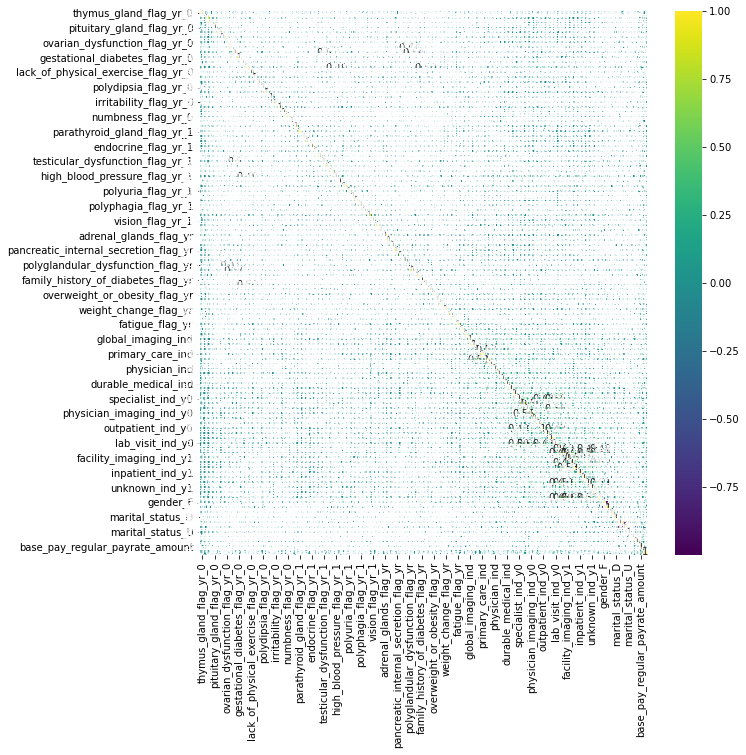

In [36]:
cm = complete_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [13]:
# TRAIN TEST VALIDATION SPLIT
target_variable = ["target"]
out_of_sample_percentage = 20
validation_row = int(complete_df.shape[0]*out_of_sample_percentage/100)
shuffled_dataframe = complete_df.sample(frac=1, random_state=42)
X_val = shuffled_dataframe[-validation_row:].drop(target_variable,axis=1)
y_val = shuffled_dataframe[-validation_row:][target_variable] 
X = shuffled_dataframe[:-validation_row].drop(target_variable,axis=1)
y = shuffled_dataframe[:-validation_row][target_variable] 
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.25, shuffle=True, random_state=123)
print(f"Training : {X_train.shape}, {X_test.shape}" )
print(f"Validation : {X_val.shape}, {y_val.shape}")

Training : (396084, 109), (132028, 109)
Validation : (132028, 109), (132028, 1)


In [12]:
metrics_keeper = pd.DataFrame()
classes = 2
class_names = ["No","Yes"]

In [6]:
lr_model_1 = LogisticRegression()
rf_model_1 = RandomForestClassifier()
gb_model_1 = GradientBoostingClassifier()

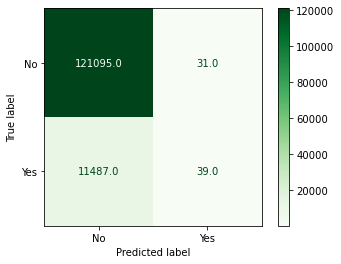

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      1.00      0.00      0.95      0.06      0.00    121126
          1       0.56      0.00      1.00      0.01      0.06      0.00     11526

avg / total       0.88      0.91      0.09      0.87      0.06      0.00    132652



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,1.00,0.95,0,0.913171,0.005683,0.501564,0.323561,gb_model_2
1,0.56,0.00,0.01,1,0.913171,0.005683,0.501564,0.323561,gb_model_2


In [12]:
# Gradient boosting 
gb_clf = gb_model_1.fit(X_train, y_train)
model_name = "gb_model_2"
pred  = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
precision, recall, _ = precision_recall_curve(y_test, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper)
plot_confusion_matrix(gb_clf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test, gb_clf.predict(X_test)))
metrics_keeper.head(2)

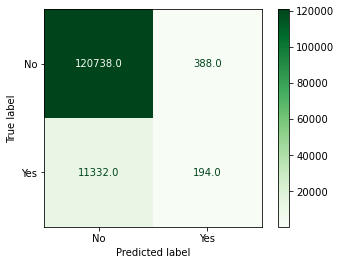

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      1.00      0.02      0.95      0.13      0.02    121126
          1       0.33      0.02      1.00      0.03      0.13      0.02     11526

avg / total       0.86      0.91      0.10      0.87      0.13      0.02    132652



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,1.00,0.95,0,0.911649,0.023891,0.506814,0.217796,rf_model_1
1,0.33,0.02,0.03,1,0.911649,0.023891,0.506814,0.217796,rf_model_1


In [13]:
# random forest
rf_clf = rf_model_1.fit(X_train, y_train)
model_name = "rf_model_1"
pred  = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
precision, recall, _ = precision_recall_curve(y_test, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper)
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test, rf_clf.predict(X_test)))
metrics_keeper.head(2)

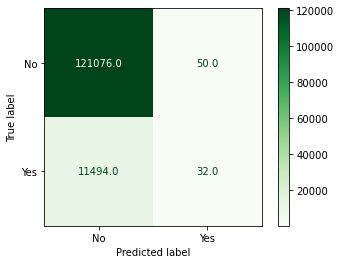

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      1.00      0.02      0.95      0.13      0.02    121126
          1       0.33      0.02      1.00      0.03      0.13      0.02     11526

avg / total       0.86      0.91      0.10      0.87      0.13      0.02    132652



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,1.00,0.95,0,0.912975,0.004291,0.501182,0.239834,log_model_1
1,0.39,0.00,0.01,1,0.912975,0.004291,0.501182,0.239834,log_model_1


In [14]:
# logistic
lr_clf = lr_model_1.fit(X_train, y_train)
model_name = "log_model_1"
pred  = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
precision, recall, _ = precision_recall_curve(y_test, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper)
plot_confusion_matrix(lr_clf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test, rf_clf.predict(X_test)))
metrics_keeper.head(2)

In [15]:
metrics_keeper

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,1.00,0.95,0,0.912975,0.004291,0.501182,0.239834,log_model_1
1,0.39,0.00,0.01,1,0.912975,0.004291,0.501182,0.239834,log_model_1
0,0.91,1.00,0.95,0,0.911649,0.023891,0.506814,0.217796,rf_model_1
1,0.33,0.02,0.03,1,0.911649,0.023891,0.506814,0.217796,rf_model_1
0,0.91,1.00,0.95,0,0.913171,0.005683,0.501564,0.323561,gb_model_2
1,0.56,0.00,0.01,1,0.913171,0.005683,0.501564,0.323561,gb_model_2


In [16]:
gf = reload(gf)
gf.find_best_model(metrics_keeper, "1", 0.95)

array(['rf_model_1', 'gb_model_2', 'log_model_1'], dtype=object)

# artifacts for best model

In [14]:

import sys
#sys.path.insert(0,'../..')
import general_functions as gf
from importlib import reload
gf=reload(gf)

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
# TRAIN TEST  SPLIT
target_variable = ["target"]
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

In [42]:
X_smt.join(y_smt).to_csv("./smote_rd_4.csv")

In [17]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smt ,y_smt ,test_size=0.25, shuffle=True, random_state=123)
print(X_train_s.shape, X_test_s.shape )

(722949, 109) (240983, 109)


In [18]:
metrics_keeper_smote = pd.DataFrame()
classes = 2
class_names = ["No","Yes"]

# XG Boost

In [45]:
xgb_model = xgb.XGBClassifier()
params = {'colsample_bytree': list(np.arange(0.1, 1,0.1)),'learning_rate': list(np.arange(0.1, 100,5)),
                'max_depth': list(range(2,30,1)), 'alpha': list(range(1,100,25)), "eval_metric":[f1_score , cohen_kappa_score]}

random_xbgmodel = RandomizedSearchCV(estimator = xgb_model, param_distributions = params, verbose=2)
random_xbgmodel.fit(X_train_s,y_train_s)
print(random_xbgmodel.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=1, colsample_bytree=0.9, eval_metric=<function f1_score at 0x000001DE5334FA60>, learning_rate=85.1, max_depth=25; total time=  19.9s
[CV] END alpha=1, colsample_bytree=0.9, eval_metric=<function f1_score at 0x000001DE5334FA60>, learning_rate=85.1, max_depth=25; total time=  18.4s
[CV] END alpha=1, colsample_bytree=0.9, eval_metric=<function f1_score at 0x000001DE5334FA60>, learning_rate=85.1, max_depth=25; total time=  18.8s
[CV] END alpha=1, colsample_bytree=0.9, eval_metric=<function f1_score at 0x000001DE5334FA60>, learning_rate=85.1, max_depth=25; total time=  20.0s
[CV] END alpha=1, colsample_bytree=0.9, eval_metric=<function f1_score at 0x000001DE5334FA60>, learning_rate=85.1, max_depth=25; total time=  20.4s
[CV] END alpha=26, colsample_bytree=0.4, eval_metric=<function f1_score at 0x000001DE5334FA60>, learning_rate=50.1, max_depth=26; total time=  15.7s
[CV] END alpha=26, colsample_bytree=0.4, eval_metr

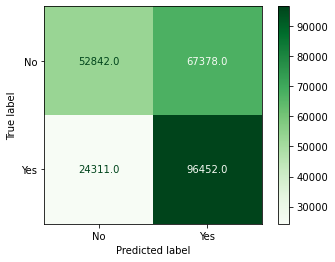

                   pre       rec       spe        f1       geo       iba       sup

          0       0.68      0.44      0.80      0.54      0.59      0.34    120220
          1       0.59      0.80      0.44      0.68      0.59      0.36    120763

avg / total       0.64      0.62      0.62      0.61      0.59      0.35    240983



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.68,0.44,0.54,0,0.619521,0.238425,0.619116,0.744152,xg_1
1,0.59,0.80,0.68,1,0.619521,0.238425,0.619116,0.744152,xg_1


In [12]:
xgb_model_1 = xgb.XGBClassifier(max_depth = 3, learning_rate = 80.1, eval_metric=cohen_kappa_score,colsample_bytree= 0.3,alpha= 1)
xg_clf = xgb_model_1.fit(X_train_s, y_train_s)
model_name = "xg_1"
pred  = xg_clf.predict(X_test_s)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper_smote = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)
plot_confusion_matrix(xg_clf, X_test_s, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, xg_clf.predict(X_test_s)))
metrics_keeper_smote.head(2)

# light boost

In [46]:
gkf = KFold(n_splits=5, shuffle=True, random_state=2).split(X=X_train, y=y_train)

params = {
    'num_leaves': [31, 127, 200],
    'reg_alpha': [0.1, 0.5, 1],
    'min_data_in_leaf': [30, 50, 100, 300, 400, 500],
    'lambda_l1': [0, 1, 1.5, 2],
    'lambda_l2': [0, 1, 2]
    }

lgb_model = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='average_precision')

gsearch = RandomizedSearchCV(estimator=lgb_model, param_distributions=params, cv=gkf, verbose=2)
lgb_model = gsearch.fit(X=X_train_s, y=y_train_s)

print(lgb_model.best_params_, lgb_model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[CV] END lambda_l1=1.5, lambda_l2=0, min_data_in_leaf=100, num_leaves=127, reg_alpha=1; total time=  39.5s
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_r

[CV] END lambda_l1=2, lambda_l2=0, min_data_in_leaf=400, num_leaves=127, reg_alpha=0.5; total time=  40.8s
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[CV] END lambda_l1=2, lambda_l2=2, min_data_in_leaf=30, num_leaves=127, reg_alpha=0.5; total time=  34.8s
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] nu

[CV] END lambda_l1=0, lambda_l2=0, min_data_in_leaf=400, num_leaves=31, reg_alpha=0.5; total time=  22.7s
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[CV] END lambda_l1=2, lambda_l2=2, min_data_in_leaf=30, num_leaves=127, reg_alpha=0.1; total time=  35.4s
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] num

[CV] END lambda_l1=1.5, lambda_l2=2, min_data_in_leaf=300, num_leaves=200, reg_alpha=1; total time=  45.7s
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[CV] END lambda_l1=2, lambda_l2=1, min_data_in_leaf=400, num_leaves=31, reg_alpha=0.1; total time=  26.7s
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

In [47]:
lgb_model.best_estimator_

LGBMClassifier(lambda_l1=1.5, lambda_l2=2, learning_rate=0.01,
               metric='average_precision', min_data_in_leaf=300,
               num_boost_round=2000, num_leaves=200, objective='binary',
               reg_alpha=1)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


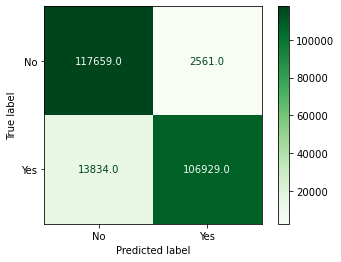

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.98      0.89      0.93      0.93      0.87    120220
          1       0.98      0.89      0.98      0.93      0.93      0.86    120763

avg / total       0.94      0.93      0.93      0.93      0.93      0.87    240983



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.89,0.98,0.93,0,0.931966,0.86396,0.932071,0.959731,lgb_1
1,0.98,0.89,0.93,1,0.931966,0.86396,0.932071,0.959731,lgb_1


In [13]:
lgb_model_1 = lgb.LGBMClassifier(
                                 lambda_l1=2, 
                                 lambda_l2=1.5, 
                                 learning_rate=0.01,
                                 boosting_type='gbdt',
                                 objective='binary',
                                 metric='average_precision',
                                 min_data_in_leaf=300,
                                 num_boost_round=2000,
                                 num_leaves=200,
                                 reg_alpha=1)
lgb_clf = lgb_model_1.fit(X_train_s, y_train_s)
model_name = "lgb_1"
pred  = lgb_clf.predict(X_test_s)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper_smote = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)
plot_confusion_matrix(lgb_clf, X_test_s, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, lgb_clf.predict(X_test_s)))
metrics_keeper_smote.head(2)

In [14]:
lr_model_1 = LogisticRegression()
rf_model_1 = RandomForestClassifier()
gb_model_1 = GradientBoostingClassifier()

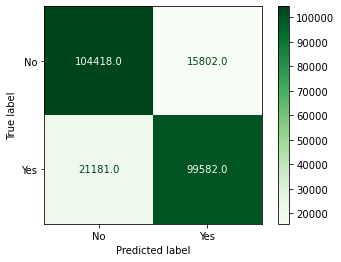

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.87      0.82      0.85      0.85      0.72    120220
          1       0.86      0.82      0.87      0.84      0.85      0.71    120763

avg / total       0.85      0.85      0.85      0.85      0.85      0.72    240983



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.83,0.87,0.85,0,0.846533,0.693095,0.846582,0.887775,gb_model_1
1,0.86,0.82,0.84,1,0.846533,0.693095,0.846582,0.887775,gb_model_1


In [15]:
# Gradient boosting 
gb_clf = gb_model_1.fit(X_train_s, y_train_s)
model_name = "gb_model_1"
pred  = gb_clf.predict(X_test_s)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper_smote = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)
plot_confusion_matrix(gb_clf, X_test_s, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, gb_clf.predict(X_test_s)))
metrics_keeper_smote.head(2)

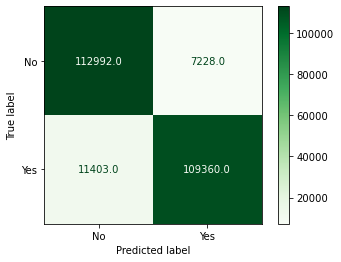

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.94      0.91      0.92      0.92      0.85    120220
          1       0.94      0.91      0.94      0.92      0.92      0.85    120763

avg / total       0.92      0.92      0.92      0.92      0.92      0.85    240983

ROC curve


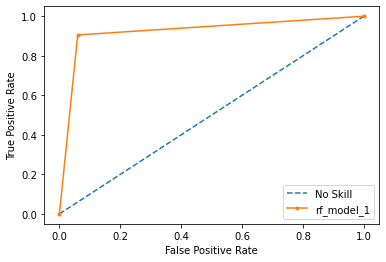

 
 
 
 
AUCPR curve


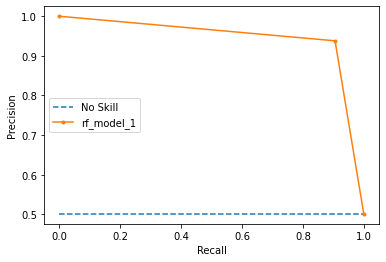

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,0.94,0.92,0,0.922687,0.845386,0.922726,0.945449,rf_model_1
1,0.94,0.91,0.92,1,0.922687,0.845386,0.922726,0.945449,rf_model_1


In [16]:
# random forest
rf_clf = rf_model_1.fit(X_train_s, y_train_s)
model_name = "rf_model_1"
pred  = rf_clf.predict(X_test_s)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper_smote = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)
plot_confusion_matrix(rf_clf, X_test_s, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, rf_clf.predict(X_test_s)))
print('=======================================================================================================')
print('ROC curve')
gf.show_roc_curve(y_test_s,pred,model_name)
print(' ')
print(' ')
print(' ')
print(' ')
print('AUCPR curve')
gf.show_aucpr_curve(y_test_s,pred,model_name)
metrics_keeper_smote.head(2)

In [17]:
feature_scores = pd.Series(lgb_clf.feature_importances_, index = X_train_s.columns).sort_values(ascending=False)
feature_scores

age                                        135668
base_pay_regular_payrate_amount            119892
high_blood_pressure_flag_yr                  6040
physician_ind                                6015
lab_visit_ind                                5922
unknown_ind                                  5238
lab_visit_ind_y0                             5011
gender_F                                     4757
outpatient_ind                               4702
marital_status_S                             4679
marital_status_M                             4601
global_imaging_ind                           4323
high_blood_pressure_flag_yr_0                4277
unknown_ind_y0                               3812
lab_visit_ind_y1                             3797
primary_care_ind_y1                          3737
outpatient_ind_y0                            3671
primary_care_ind_y0                          3617
physician_imaging_ind                        3483
specialist_ind                               3451


In [107]:
feature_scores.head(50).index

Index(['age', 'base_pay_regular_payrate_amount', 'tot_billed_amt_yr',
       'tot_billed_amt_yr_0', 'tot_billed_amt_yr_1',
       'high_blood_pressure_flag_yr', 'unknown_ind', 'lab_visit_ind',
       'physician_ind', 'unknown_ind_y0', 'gender_F',
       'high_blood_pressure_flag_yr_0', 'global_imaging_ind',
       'marital_status_S', 'outpatient_ind', 'specialist_ind',
       'marital_status_M', 'primary_care_ind_y1', 'physician_imaging_ind',
       'global_imaging_ind_y1', 'global_imaging_ind_y0', 'primary_care_ind',
       'specialist_ind_y1', 'primary_care_ind_y0', 'outpatient_ind_y1',
       'outpatient_ind_y0', 'gender_M', 'durable_medical_ind',
       'durable_medical_ind_y0', 'specialist_ind_y0',
       'high_blood_pressure_flag_yr_1', 'lab_visit_ind_y1', 'lab_visit_ind_y0',
       'unknown_ind_y1', 'marital_status_U', 'physician_ind_y0',
       'physician_imaging_ind_y0', 'durable_medical_ind_y1',
       'physician_ind_y1', 'inpatient_ind', 'physician_imaging_ind_y1',
       'o

<Figure size 2160x2160 with 0 Axes>

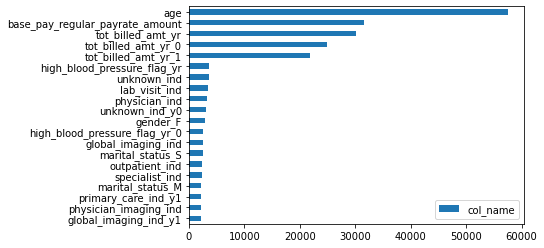

.........................Top 20 Important Features for Diabetes......................


In [134]:
feat_vis=pd.DataFrame({'col_name': lgb_clf.feature_importances_}, index=X_train_s.columns).sort_values(by='col_name', ascending=True)
plt.figure(figsize=(30,30))

feat_vis=feat_vis.tail(20)
feat_vis.plot(kind='barh')
plt.show()
print('.........................Top 20 Important Features for Diabetes......................')

Text(0.5, 0, 'Feature Importance')

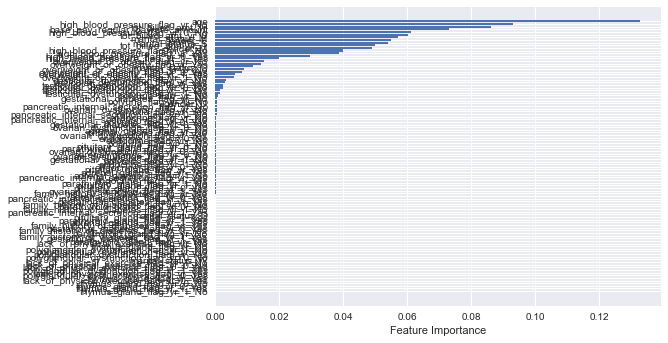

In [45]:
sort = rf_clf.feature_importances_.argsort()
plt.barh(complete_df.columns[sort], rf_clf.feature_importances_[sort])
plt.xlabel('Feature Importance')

In [53]:
metrics_keeper_smote

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,0.94,0.92,0,0.922617,0.845245,0.922654,0.945258,rf_model_1
1,0.94,0.91,0.92,1,0.922617,0.845245,0.922654,0.945258,rf_model_1
0,0.83,0.87,0.85,0,0.846624,0.693280,0.846678,0.888081,gb_model_1
1,0.86,0.82,0.84,1,0.846624,0.693280,0.846678,0.888081,gb_model_1
0,0.89,0.98,0.93,0,0.931547,0.863123,0.931654,0.959656,lgb_1
1,0.98,0.88,0.93,1,0.931547,0.863123,0.931654,0.959656,lgb_1
0,0.68,0.44,0.53,0,0.618662,0.236708,0.618259,0.743464,xg_1
1,0.59,0.80,0.68,1,0.618662,0.236708,0.618259,0.743464,xg_1


In [18]:
gf = reload(gf)
gf.find_best_model(metrics_keeper_smote, "1", 0.98)

array(['lgb_1', 'rf_model_1', 'gb_model_1'], dtype=object)

# artifacts for best model

In [19]:
best_model = lgb_clf

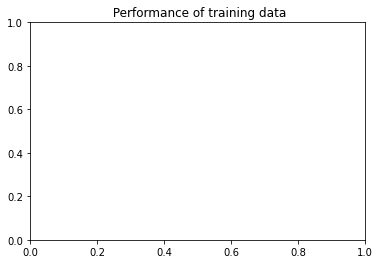

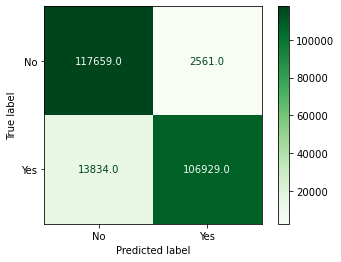

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.98      0.89      0.93      0.93      0.87    120220
          1       0.98      0.89      0.98      0.93      0.93      0.86    120763

avg / total       0.94      0.93      0.93      0.93      0.93      0.87    240983

ROC curve


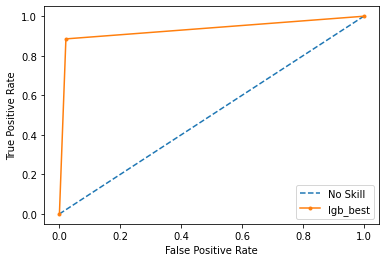

 
 
 
 
AUCPR curve


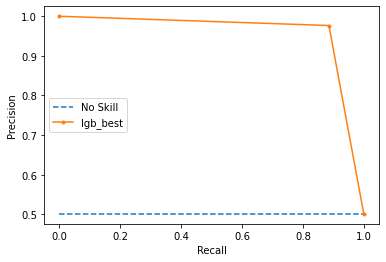

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.89,0.98,0.93,0,0.931966,0.863960,0.932071,0.959731,lgb_best
1,0.98,0.89,0.93,1,0.931966,0.863960,0.932071,0.959731,lgb_best
0,0.91,0.94,0.92,0,0.922687,0.845386,0.922726,0.945449,rf_model_1
1,0.94,0.91,0.92,1,0.922687,0.845386,0.922726,0.945449,rf_model_1
0,0.83,0.87,0.85,0,0.846533,0.693095,0.846582,0.887775,gb_model_1
1,0.86,0.82,0.84,1,0.846533,0.693095,0.846582,0.887775,gb_model_1
0,0.89,0.98,0.93,0,0.931966,0.863960,0.932071,0.959731,lgb_1
1,0.98,0.89,0.93,1,0.931966,0.863960,0.932071,0.959731,lgb_1
0,0.68,0.44,0.54,0,0.619521,0.238425,0.619116,0.744152,xg_1
1,0.59,0.80,0.68,1,0.619521,0.238425,0.619116,0.744152,xg_1


In [20]:
model_name = "lgb_best"
pred  = best_model.predict(X_test_s)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
plt.title(f" Performance of training data")
plot_confusion_matrix(best_model, X_test_s, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, best_model.predict(X_test_s)))
print('=======================================================================================================')
print('ROC curve')
gf.show_roc_curve(y_test_s,pred,model_name)
print(' ')
print(' ')
print(' ')
print(' ')
print('AUCPR curve')
gf.show_aucpr_curve(y_test_s,pred,model_name)
gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)

## save the model to pickle

In [19]:
import pickle
filename = 'lgb_clf_model.sav'

In [ ]:

pickle.dump(best_model, open(filename, 'wb'))
# some time later...

In [21]:
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_val, y_val)
print(result)

0.9058230072408883


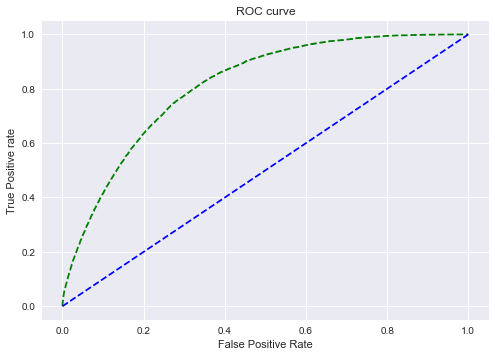

In [57]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_val, best_model.predict_proba(X_val)[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='best model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig('ROC',dpi=300)
plt.show();

Best model: f1=0.043 auc=0.288


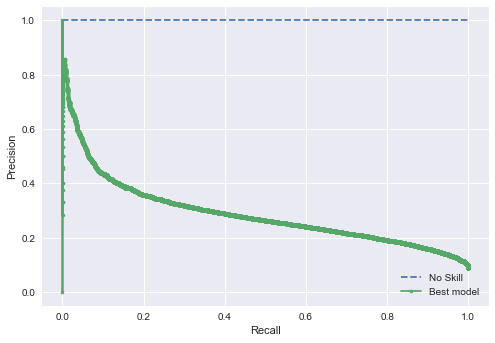

In [58]:
# plot the precision-recall curves
yhat = lgb_clf.predict(X_val)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_val, lgb_clf.predict_proba(X_val)[:,1])
xgb_f1, xgb_auc = f1_score(y_test, yhat), auc(xgb_recall, xgb_precision)
# summarize scores
print('Best model: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='Best model')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Validation of Best model

In [21]:
best_model = lgb_clf

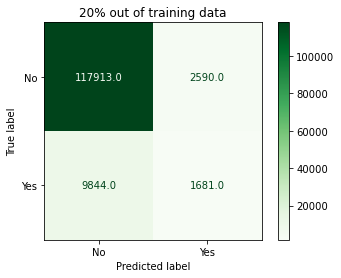

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.98      0.15      0.95      0.38      0.15    120503
          1       0.39      0.15      0.98      0.21      0.38      0.13     11525

avg / total       0.88      0.91      0.22      0.89      0.38      0.15    132028

ROC curve


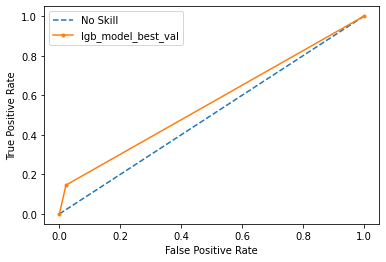

 
 
 
 
AUCPR curve


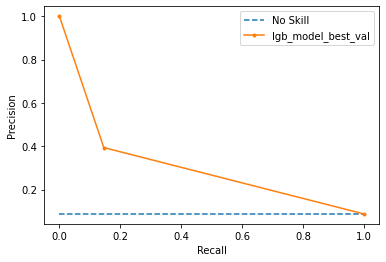

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.92,0.98,0.95,0,0.905823,0.173840,0.562182,0.307001,lgb_model_best_val
1,0.39,0.15,0.21,1,0.905823,0.173840,0.562182,0.307001,lgb_model_best_val
0,0.91,0.94,0.92,0,0.922687,0.845386,0.922726,0.945449,rf_model_1
1,0.94,0.91,0.92,1,0.922687,0.845386,0.922726,0.945449,rf_model_1
0,0.83,0.87,0.85,0,0.846533,0.693095,0.846582,0.887775,gb_model_1
1,0.86,0.82,0.84,1,0.846533,0.693095,0.846582,0.887775,gb_model_1
0,0.89,0.98,0.93,0,0.931966,0.863960,0.932071,0.959731,lgb_1
1,0.98,0.89,0.93,1,0.931966,0.863960,0.932071,0.959731,lgb_1
0,0.68,0.44,0.54,0,0.619521,0.238425,0.619116,0.744152,xg_1
1,0.59,0.80,0.68,1,0.619521,0.238425,0.619116,0.744152,xg_1


In [22]:
model_name = "lgb_model_best_val"
pred  = best_model.predict(X_val)
accuracy = accuracy_score(y_val, pred)
kappa = cohen_kappa_score(y_val, pred)
roc = roc_auc_score(y_val, pred)
precision, recall, _ = precision_recall_curve(y_val, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_val, pred).split(" ") if i !="" and "\n" not in i][:-9]
plot_confusion_matrix(best_model, X_val, y_val, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.title(f"{out_of_sample_percentage}% out of training data")
plt.show()
print(classification_report_imbalanced(y_val, best_model.predict(X_val)))
print('=======================================================================================================')
print('ROC curve')
gf.show_roc_curve(y_val,pred,model_name)
print(' ')
print(' ')
print(' ')
print(' ')
print('AUCPR curve')
gf.show_aucpr_curve(y_val,pred,model_name)
gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)

In [23]:
classification_report(y_val, pred).split("\n")

['              precision    recall  f1-score   support',
 '',
 '           0       0.92      0.98      0.95    120503',
 '           1       0.39      0.15      0.21     11525',
 '',
 '    accuracy                           0.91    132028',
 '   macro avg       0.66      0.56      0.58    132028',
 'weighted avg       0.88      0.91      0.89    132028',
 '']

In [19]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score, fbeta_score, f1_score
f1_score(y_val, pred)
f1_score(y_val, pred, average='macro')

0.581610829509947

In [35]:
# imporiving threshold for f1
thresholds = np.arange(0, 1, 0.001)
yhat = best_model.predict_proba(X_val)
scores = [f1_score(y_val, (yhat[:, 1] >= t).astype('int'), average='macro') for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.218, F-Score=0.61593


<Figure size 2160x2160 with 0 Axes>

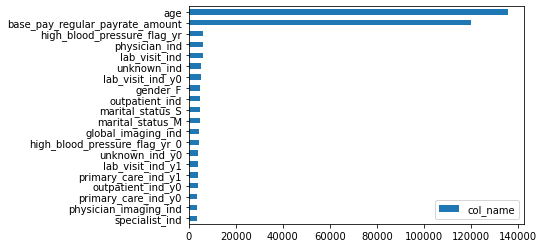

.........................Top 20 Important Features for Diabetes......................


In [24]:
feat_vis=pd.DataFrame({'col_name': lgb_clf.feature_importances_}, index=X_train_s.columns).sort_values(by='col_name', ascending=True)
plt.figure(figsize=(30,30))

feat_vis=feat_vis.tail(20)
feat_vis.plot(kind='barh')
plt.show()
print('.........................Top 20 Important Features for Diabetes......................')

# curved plots (WIP)

In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [34]:
best_model.predict_proba(X_test)[:,1]

array([0.04625181, 0.07168635, 0.17768685, ..., 0.00368832, 0.02245151,
       0.01075796])

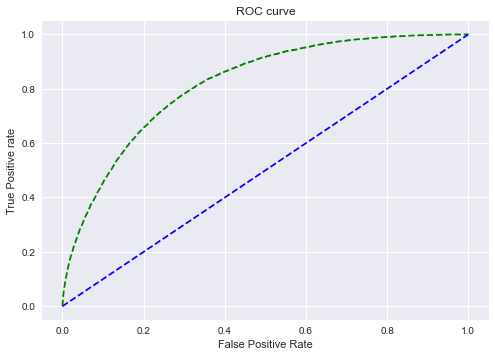

In [35]:
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, best_model.predict_proba(X_test)[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='best model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig('ROC',dpi=300)
plt.show();

Best model: f1=0.042 auc=0.320


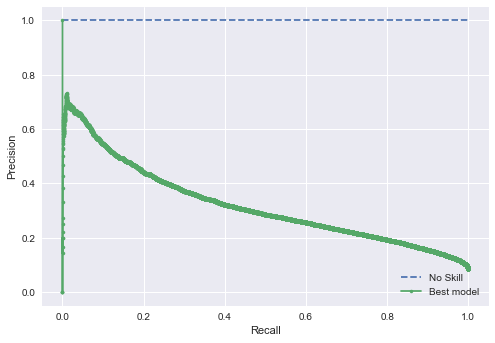

In [41]:
# plot the precision-recall curves
yhat = lgb_clf.predict(X_test)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, lgb_clf.predict_proba(X_test)[:,1])
xgb_f1, xgb_auc = f1_score(y_test, yhat), auc(xgb_recall, xgb_precision)
# summarize scores
print('Best model: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='Best model')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [22]:
import shap

In [ ]:
explainer_xg = shap.TreeExplainer(loaded_model, model_output="margin")
shap_values_xg = explainer_xg.shap_values(X_test_s)

In [ ]:
# baseline
expected_value_xg = explainer_xg.expected_value
if isinstance(expected_value_xg, list):
    expected_value_xg = expected_value_xg[1]
print(f'Expected values are : {expected_value_xg}')

In [ ]:
shap.summary_plot(shap_values_xg, X_test_s)

In [ ]:
#shap.summary_plot(shap_values_xg, X_test_s, plot_type="bar")

# Training the data after filtering the features

In [27]:
X_train_s1 = X_train_s[['age', 'base_pay_regular_payrate_amount', 'tot_billed_amt_yr',
       'tot_billed_amt_yr_0', 'tot_billed_amt_yr_1',
       'high_blood_pressure_flag_yr', 'unknown_ind', 'lab_visit_ind',
       'physician_ind', 'unknown_ind_y0', 'gender_F',
       'high_blood_pressure_flag_yr_0', 'global_imaging_ind',
       'marital_status_S', 'outpatient_ind', 'specialist_ind',
       'marital_status_M', 'primary_care_ind_y1', 'physician_imaging_ind',
       'global_imaging_ind_y1', 'global_imaging_ind_y0', 'primary_care_ind',
       'specialist_ind_y1', 'primary_care_ind_y0', 'outpatient_ind_y1',
       'outpatient_ind_y0', 'gender_M', 'durable_medical_ind',
       'durable_medical_ind_y0', 'specialist_ind_y0',
       'high_blood_pressure_flag_yr_1', 'lab_visit_ind_y1', 'lab_visit_ind_y0',
       'unknown_ind_y1', 'marital_status_U', 'physician_ind_y0',
       'physician_imaging_ind_y0', 'durable_medical_ind_y1',
       'physician_ind_y1', 'inpatient_ind', 'physician_imaging_ind_y1',
       'overweight_or_obesity_flag_yr', 'inpatient_ind_y0', 'inpatient_ind_y1',
       'overweight_or_obesity_flag_yr_0', 'facility_imaging_ind',
       'overweight_or_obesity_flag_yr_1', 'gender_U',
       'facility_imaging_ind_y0', 'testicular_dysfunction_flag_yr']]

In [23]:
X_test_s1 = X_test_s[['age', 'base_pay_regular_payrate_amount', 'tot_billed_amt_yr',
       'tot_billed_amt_yr_0', 'tot_billed_amt_yr_1',
       'high_blood_pressure_flag_yr', 'unknown_ind', 'lab_visit_ind',
       'physician_ind', 'unknown_ind_y0', 'gender_F',
       'high_blood_pressure_flag_yr_0', 'global_imaging_ind',
       'marital_status_S', 'outpatient_ind', 'specialist_ind',
       'marital_status_M', 'primary_care_ind_y1', 'physician_imaging_ind',
       'global_imaging_ind_y1', 'global_imaging_ind_y0', 'primary_care_ind',
       'specialist_ind_y1', 'primary_care_ind_y0', 'outpatient_ind_y1',
       'outpatient_ind_y0', 'gender_M', 'durable_medical_ind',
       'durable_medical_ind_y0', 'specialist_ind_y0',
       'high_blood_pressure_flag_yr_1', 'lab_visit_ind_y1', 'lab_visit_ind_y0',
       'unknown_ind_y1', 'marital_status_U', 'physician_ind_y0',
       'physician_imaging_ind_y0', 'durable_medical_ind_y1',
       'physician_ind_y1', 'inpatient_ind', 'physician_imaging_ind_y1',
       'overweight_or_obesity_flag_yr', 'inpatient_ind_y0', 'inpatient_ind_y1',
       'overweight_or_obesity_flag_yr_0', 'facility_imaging_ind',
       'overweight_or_obesity_flag_yr_1', 'gender_U',
       'facility_imaging_ind_y0', 'testicular_dysfunction_flag_yr']]

In [24]:
X_val1 = X_val[['age', 'base_pay_regular_payrate_amount', 'tot_billed_amt_yr',
       'tot_billed_amt_yr_0', 'tot_billed_amt_yr_1',
       'high_blood_pressure_flag_yr', 'unknown_ind', 'lab_visit_ind',
       'physician_ind', 'unknown_ind_y0', 'gender_F',
       'high_blood_pressure_flag_yr_0', 'global_imaging_ind',
       'marital_status_S', 'outpatient_ind', 'specialist_ind',
       'marital_status_M', 'primary_care_ind_y1', 'physician_imaging_ind',
       'global_imaging_ind_y1', 'global_imaging_ind_y0', 'primary_care_ind',
       'specialist_ind_y1', 'primary_care_ind_y0', 'outpatient_ind_y1',
       'outpatient_ind_y0', 'gender_M', 'durable_medical_ind',
       'durable_medical_ind_y0', 'specialist_ind_y0',
       'high_blood_pressure_flag_yr_1', 'lab_visit_ind_y1', 'lab_visit_ind_y0',
       'unknown_ind_y1', 'marital_status_U', 'physician_ind_y0',
       'physician_imaging_ind_y0', 'durable_medical_ind_y1',
       'physician_ind_y1', 'inpatient_ind', 'physician_imaging_ind_y1',
       'overweight_or_obesity_flag_yr', 'inpatient_ind_y0', 'inpatient_ind_y1',
       'overweight_or_obesity_flag_yr_0', 'facility_imaging_ind',
       'overweight_or_obesity_flag_yr_1', 'gender_U',
       'facility_imaging_ind_y0', 'testicular_dysfunction_flag_yr']]

In [25]:
X_val1.shape

(133009, 50)

# Train & validate best model after filtering the columns

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


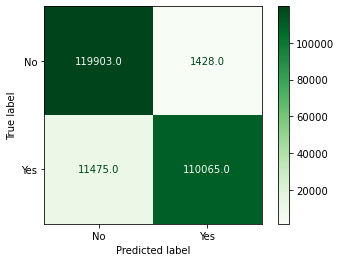

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.99      0.91      0.95      0.95      0.90    121331
          1       0.99      0.91      0.99      0.94      0.95      0.89    121540

avg / total       0.95      0.95      0.95      0.95      0.95      0.89    242871



,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,0.99,0.95,0,0.946873,0.893754,0.946909,0.970013,lgb_1
1,0.99,0.91,0.94,1,0.946873,0.893754,0.946909,0.970013,lgb_1


In [28]:
lgb_model_1 = lgb.LGBMClassifier(
                                 lambda_l1=2, 
                                 lambda_l2=0, 
                                 learning_rate=0.01,
                                 boosting_type='gbdt',
                                 objective='binary',
                                 metric='average_precision',
                                 min_data_in_leaf=100,
                                 num_boost_round=2000,
                                 num_leaves=127,
                                 reg_alpha=0.5)
lgb_clf_filter = lgb_model_1.fit(X_train_s1, y_train_s)
model_name = "lgb_1"
pred  = lgb_clf_filter.predict(X_test_s1)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
metrics_keeper_smote = gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)
plot_confusion_matrix(lgb_clf_filter, X_test_s1, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, lgb_clf_filter.predict(X_test_s1)))
metrics_keeper_smote.head(2)

In [29]:
best_model = lgb_clf_filter

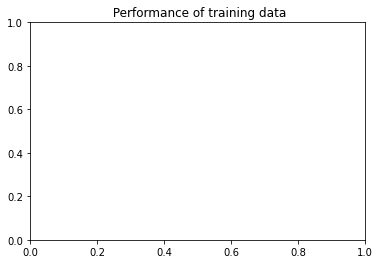

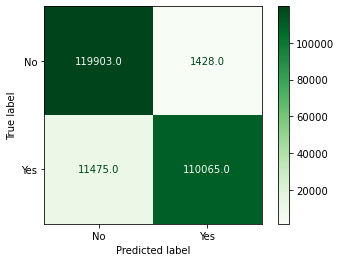

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.99      0.91      0.95      0.95      0.90    121331
          1       0.99      0.91      0.99      0.94      0.95      0.89    121540

avg / total       0.95      0.95      0.95      0.95      0.95      0.89    242871

ROC curve


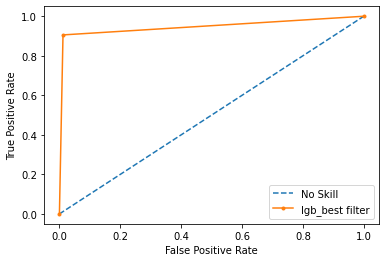

 
 
 
 
AUCPR curve


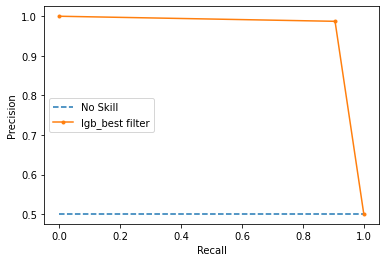

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.91,0.99,0.95,0,0.946873,0.893754,0.946909,0.970013,lgb_best filter
1,0.99,0.91,0.94,1,0.946873,0.893754,0.946909,0.970013,lgb_best filter
0,0.91,0.99,0.95,0,0.946873,0.893754,0.946909,0.970013,lgb_1
1,0.99,0.91,0.94,1,0.946873,0.893754,0.946909,0.970013,lgb_1
0,0.91,0.99,0.95,0,0.946988,0.893984,0.947023,0.969975,lgb_1
1,0.99,0.91,0.94,1,0.946988,0.893984,0.947023,0.969975,lgb_1


In [30]:
model_name = "lgb_best filter"
pred  = best_model.predict(X_test_s1)
accuracy = accuracy_score(y_test_s, pred)
kappa = cohen_kappa_score(y_test_s, pred)
roc = roc_auc_score(y_test_s, pred)
precision, recall, _ = precision_recall_curve(y_test_s, pred)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_test_s, pred).split(" ") if i !="" and "\n" not in i][:-9]
plt.title(f" Performance of training data")
plot_confusion_matrix(best_model, X_test_s1, y_test_s, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.show()
print(classification_report_imbalanced(y_test_s, best_model.predict(X_test_s1)))
print('=======================================================================================================')
print('ROC curve')
gf.show_roc_curve(y_test_s,pred,model_name)
print(' ')
print(' ')
print(' ')
print(' ')
print('AUCPR curve')
gf.show_aucpr_curve(y_test_s,pred,model_name)
gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)

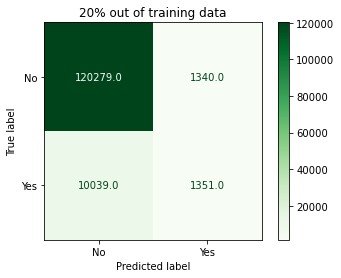

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.99      0.12      0.95      0.34      0.13    121619
          1       0.50      0.12      0.99      0.19      0.34      0.11     11390

avg / total       0.89      0.91      0.19      0.89      0.34      0.13    133009

ROC curve


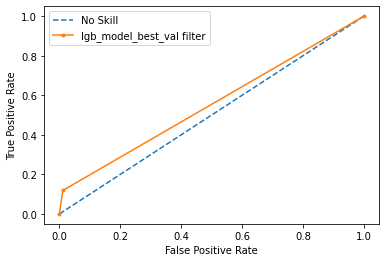

 
 
 
 
AUCPR curve


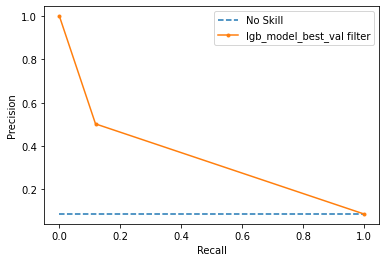

,precision,recall,f1-score,label,accuracy,kappa,auc-roc,aucpr,model
0,0.92,0.99,0.95,0,0.914449,0.164545,0.553797,0.348066,lgb_model_best_val filter
1,0.50,0.12,0.19,1,0.914449,0.164545,0.553797,0.348066,lgb_model_best_val filter
0,0.91,0.99,0.95,0,0.946873,0.893754,0.946909,0.970013,lgb_1
1,0.99,0.91,0.94,1,0.946873,0.893754,0.946909,0.970013,lgb_1
0,0.91,0.99,0.95,0,0.946988,0.893984,0.947023,0.969975,lgb_1
1,0.99,0.91,0.94,1,0.946988,0.893984,0.947023,0.969975,lgb_1


In [32]:
model_name = "lgb_model_best_val filter"
pred1  = best_model.predict(X_val1)
accuracy = accuracy_score(y_val, pred1)
kappa = cohen_kappa_score(y_val, pred1)
roc = roc_auc_score(y_val, pred1)
precision, recall, _ = precision_recall_curve(y_val, pred1)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(y_val, pred1).split(" ") if i !="" and "\n" not in i][:-9]
plot_confusion_matrix(best_model, X_val1, y_val, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.title(f"{out_of_sample_percentage}% out of training data")
plt.show()
print(classification_report_imbalanced(y_val, best_model.predict(X_val1)))
print('=======================================================================================================')
print('ROC curve')
gf.show_roc_curve(y_val,pred1,model_name)
print(' ')
print(' ')
print(' ')
print(' ')
print('AUCPR curve')
gf.show_aucpr_curve(y_val,pred1,model_name)
gf.better_report(accuracy, kappa, roc, aucpr, classes, clr, model_name).append(metrics_keeper_smote)

In [33]:
classification_report(y_val, pred1).split("\n")

['              precision    recall  f1-score   support',
 '',
 '           0       0.92      0.99      0.95    121619',
 '           1       0.50      0.12      0.19     11390',
 '',
 '    accuracy                           0.91    133009',
 '   macro avg       0.71      0.55      0.57    133009',
 'weighted avg       0.89      0.91      0.89    133009',
 '']

In [35]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score, fbeta_score, f1_score
f1_score(y_val, pred1)
f1_score(y_val, pred1, average='macro')

0.573361863568621

In [36]:
# imporiving threshold for f1
thresholds = np.arange(0, 1, 0.001)
yhat = best_model.predict_proba(X_val1)
scores = [f1_score(y_val, (yhat[:, 1] >= t).astype('int'), average='macro') for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.275, F-Score=0.64011


In [37]:
# other metrics for imbalanced
print("Balanced accuracy {}".format(balanced_accuracy_score(y_val, pred1)))
print("MCC {}".format(matthews_corrcoef(y_val, pred1)))
print("F0.5 {}".format(fbeta_score(y_val, pred1, average='macro', beta=0.5)))

Balanced accuracy 0.5537974014922074
MCC 0.21384289181653438
F0.5 0.6201825715461313


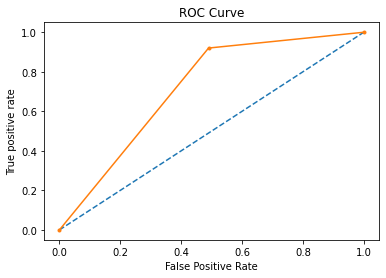

In [38]:
# from sklearn.metrics import roc_auc_score, roc_curve, calculated manually to adjust the plot
# TPR = 120k/120k+10k
# FPR = 1340/1340+1351
# print(roc_curve(y_val,pred))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot([0,.49,1], [0,0.92,1], marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive rate")
plt.show()

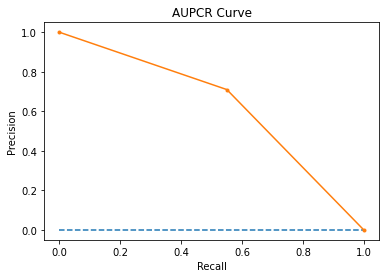

In [39]:
# plotting macro recall and precision
plt.plot([0, 1], [0, 0], linestyle='--', label='No Skill')
plt.plot([1,.55,0], [0,0.71,1], marker='.')
plt.title("AUPCR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [2]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# After filter testing

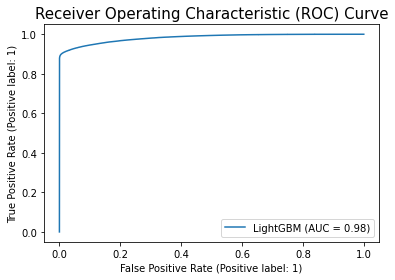

In [129]:
plot_roc_curve(estimator=best_model, X=X_test_s1, y=y_test_s, response_method='predict_proba', name='LightGBM')
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
# plt.savefig('Receiver Operating Characteristic (ROC) Curve.png')
plt.show()

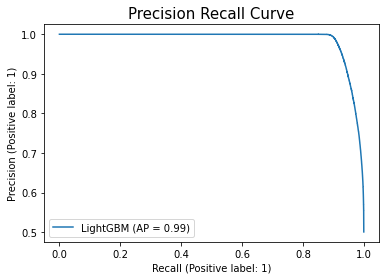

In [130]:
plot_precision_recall_curve(estimator=best_model, X=X_test_s1, y=y_test_s, response_method='predict_proba', name='LightGBM')
plt.title('Precision Recall Curve', size=15)
# plt.savefig('Precision Recall Curve - XGBoost.png')
plt.show()

# After filter validation

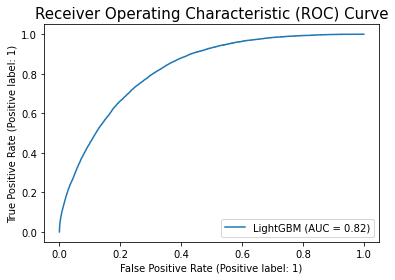

In [126]:
plot_roc_curve(estimator=best_model, X=X_val1, y=y_val, response_method='predict_proba', name='LightGBM')
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
# plt.savefig('Receiver Operating Characteristic (ROC) Curve.png')
plt.show()

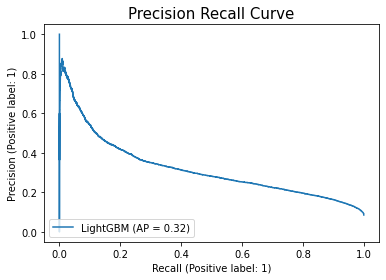

In [127]:
plot_precision_recall_curve(estimator=best_model, X=X_val1, y=y_val, response_method='predict_proba', name='LightGBM')
plt.title('Precision Recall Curve', size=15)
# plt.savefig('Precision Recall Curve - XGBoost.png')
plt.show()

<Figure size 1080x720 with 0 Axes>

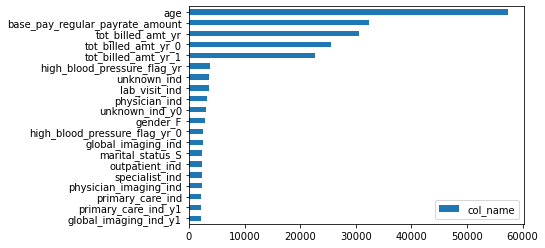

.........................Top 20 Important Features for Diabetes......................


In [131]:
feat_vis=pd.DataFrame({'col_name': lgb_clf_filter.feature_importances_}, index=X_train_s1.columns).sort_values(by='col_name', ascending=True)
plt.figure(figsize=(15,10))

feat_vis=feat_vis.tail(20)
feat_vis.plot(kind='barh')
plt.show()
print('.........................Top 20 Important Features for Diabetes......................')

<Figure size 1080x720 with 0 Axes>

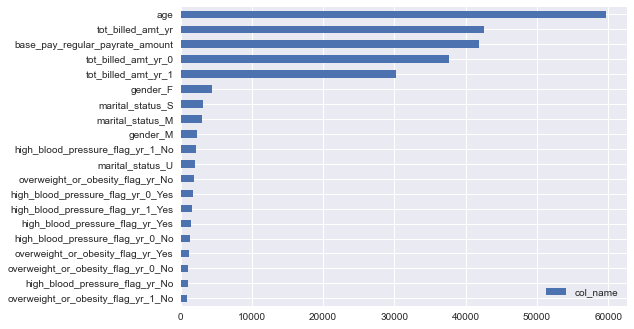

.........................Top 20 Important Features for High Spenders......................


In [39]:
feat_vis=pd.DataFrame({'col_name': lgb_clf.feature_importances_}, index=X_train_s.columns).sort_values(by='col_name', ascending=True)
plt.figure(figsize=(15,10))

feat_vis=feat_vis.tail(20)
feat_vis.plot(kind='barh')
plt.show()
print('.........................Top 20 Important Features for Diabetes......................')